### Redes de múltiplas camadas

Veremos a importância de adicionar camadas extras na rede

### Bibliotecas e leitura dos dados

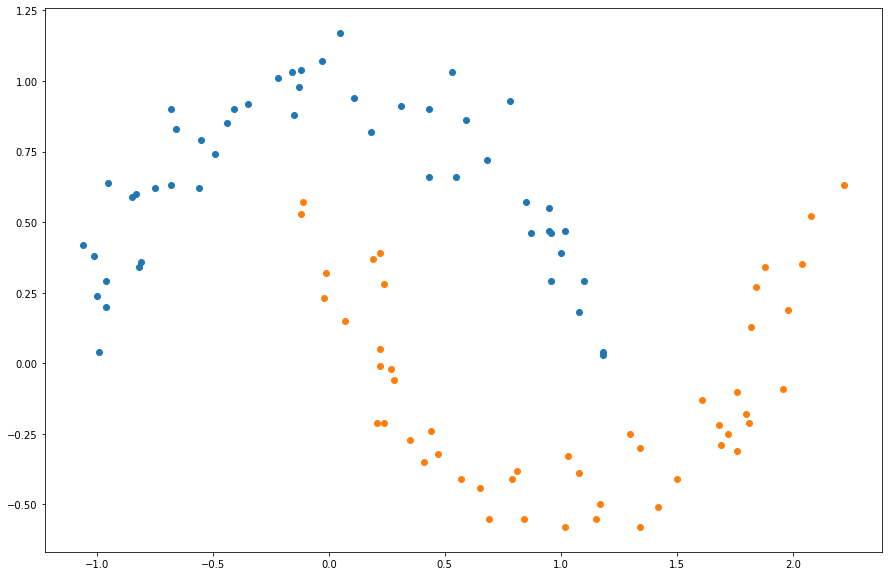

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import util

# Número de pontos em cada classe
nc = 50
data = torch.from_numpy(np.loadtxt('../data/moon_data.txt')).to(torch.float32)

inputs = data[:,:2]
targets = data[:,2]

plt.figure(figsize=(15,10))
plt.scatter(inputs[targets==0,0], inputs[targets==0,1])
plt.scatter(inputs[targets==1,0], inputs[targets==1,1])

Note que neste dataset temos duas variáveis de entrada

### Treinamento de um modelo linear

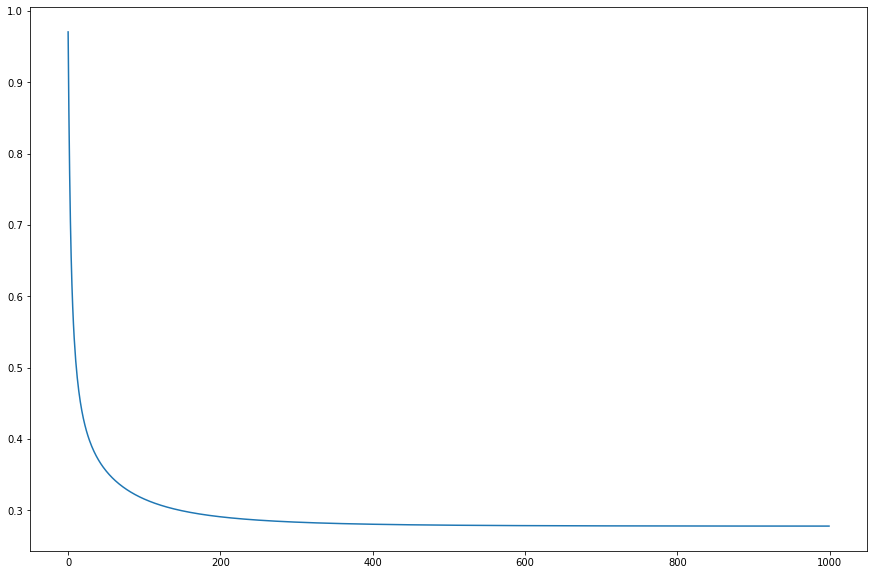

In [2]:
def train(model, inputs, targets, loss_func, num_epochs=1000, lr=0.5):

    # Temos duas variáveis, então redimensionamos a antrada para Nx2
    inputs = inputs.reshape(len(inputs),2)
    targets = targets.reshape(len(targets),1)

    optim = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(0, num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss.item())
    
    return losses

model = nn.Linear(in_features=2, out_features=1)
loss_func = nn.BCEWithLogitsLoss()

losses = train(model, inputs, targets, loss_func)

plt.figure(figsize=(15,10))
plt.plot(losses)

Nosso modelo possui capacidade apenas de separar os pontos de forma linear:

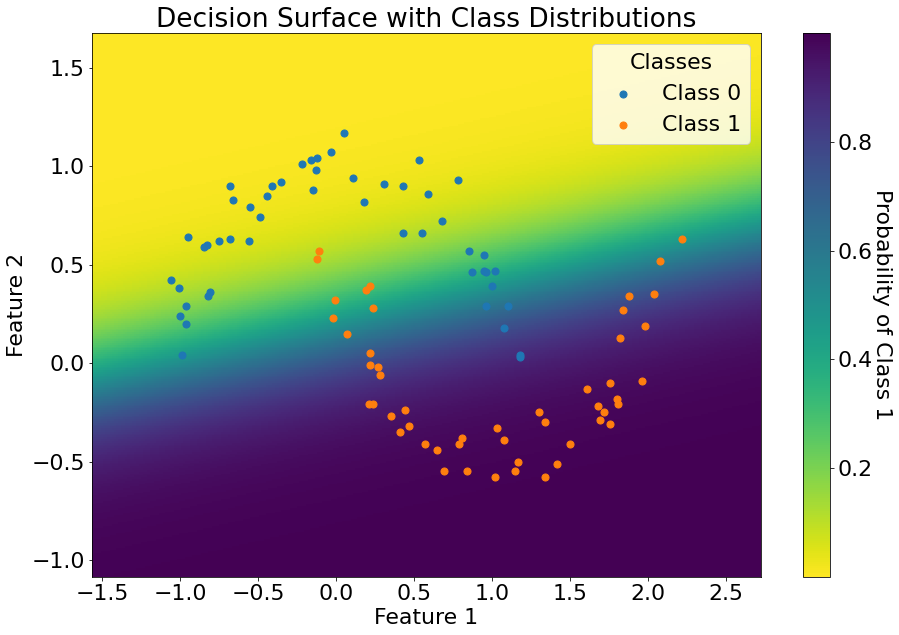

In [3]:
util.plot_regions(model, inputs, targets)

### Modelo com duas camadas

Definiremos um modelo do Pytorch possuindo duas camadas lineares

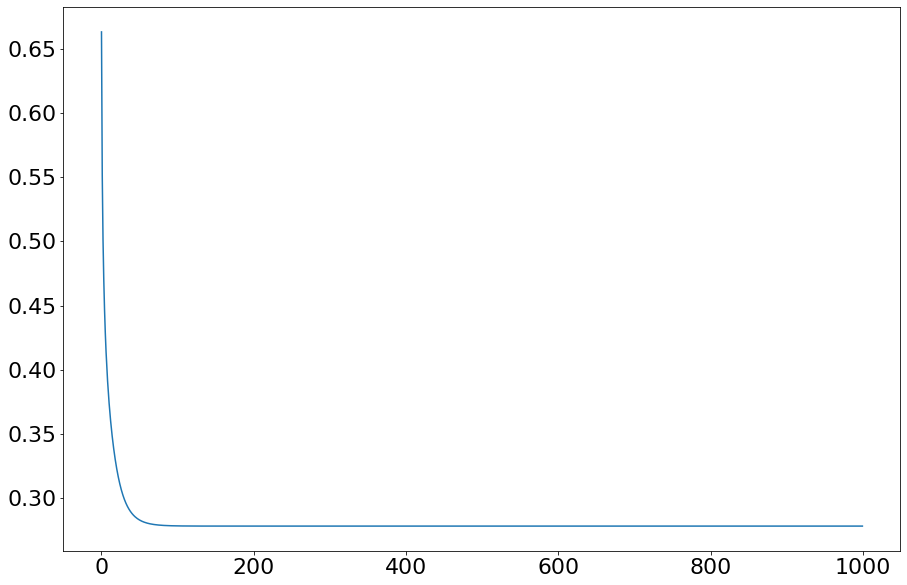

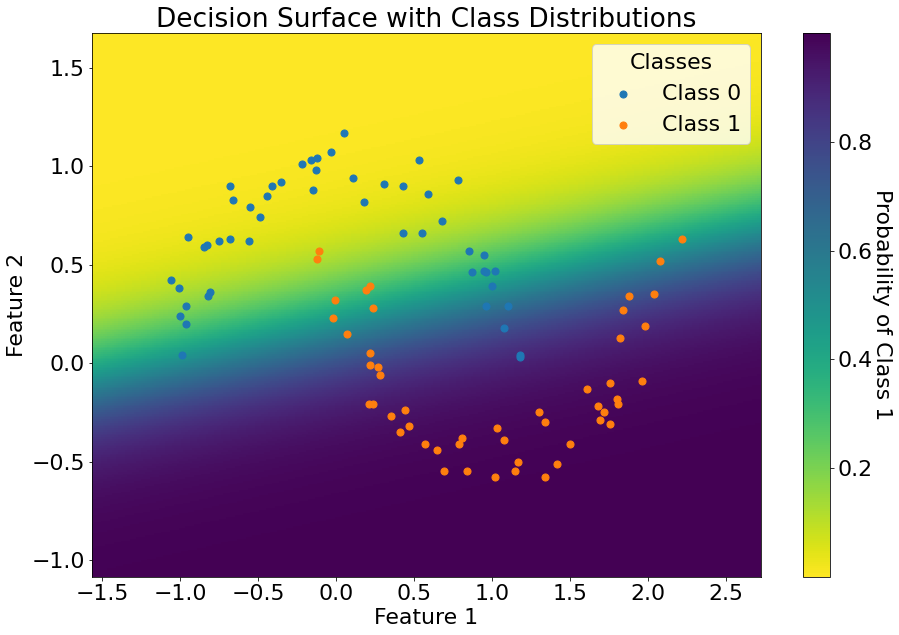

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)

        return x
    
model = Model()

losses = train(model, inputs, targets, loss_func)

plt.figure(figsize=(15,10))
plt.plot(losses)
util.plot_regions(model, inputs, targets)

Não importa o número de camadas lineares, a rede continua possuindo apenas a capacidade de separar as classes de forma linear. Isso porque duas camadas lineares são equivalentes a uma única camada linear.

### Modelo com duas camadas e Camadas(ativação) Não Lineares no PyTorch

As camadas não lineares são fundamentais para a construção de redes neurais profundas, permitindo que esses modelos aprendam e representem relações complexas nos dados. No PyTorch, essas camadas são geralmente aplicadas como funções de ativação entre camadas lineares consecutivas para introduzir não linearidades. As funções de ativação mais comuns incluem ReLU, Sigmoid, Tanh e LeakyReLU, cada uma com características e usos específicos.

#### ReLU (Rectified Linear Unit)

- **Implementação:** `nn.ReLU()`
- **Características:** A função ReLU é definida como: $$ f(x) = \max(0, x) $$ Ela é uma das funções de ativação mais usadas em redes neurais convolucionais e redes profundas em geral devido à sua simplicidade computacional e eficácia em mitigar o problema do desaparecimento do gradiente em arquiteturas profundas.
- **Uso:** É comum em quase todos os tipos de redes neurais porque tende a permitir que os modelos aprendam mais rápido e com maior eficácia, proporcionando uma ativação que não satura (isto é, o gradiente não se torna zero) para entradas positivas.

#### Sigmoid

- **Implementação:** `nn.Sigmoid()`
- **Características:** A função Sigmoid tem uma curva em forma de "S" e é definida como: $$ f(x) = \frac{1}{1 + e^{-x}} $$ Esta função transforma valores de entrada em um intervalo entre 0 e 1, tornando-a adequada para problemas onde é necessário modelar uma probabilidade como saída.
- **Uso:** Embora seja útil para a camada de saída em problemas de classificação binária, a Sigmoid é menos utilizada em camadas ocultas devido aos problemas de desaparecimento do gradiente, especialmente em redes profundas, pois os gradientes podem se tornar muito pequenos (próximos a zero) para entradas muito positivas ou negativas.

#### Tanh (Tangente Hiperbólica)

- **Implementação:** `nn.Tanh()`
- **Características:** A função Tanh também possui uma forma em "S" semelhante à Sigmoid, mas seu intervalo vai de -1 a 1. É definida como: $$ f(x) = \tanh(x) = \frac{2}{1 + e^{-2x}} - 1 $$
- **Uso:** A Tanh é frequentemente preferida à Sigmoid nas camadas ocultas de muitas arquiteturas de redes neurais porque os dados centrados em zero (média zero) tendem a fazer com que os gradientes sejam maiores. No entanto, ela ainda pode sofrer de desaparecimento de gradientes em redes muito profundas.

#### LeakyReLU

- **Implementação:** `nn.LeakyReLU()`
- **Características:** Uma variação da ReLU, a LeakyReLU é definida como: $$ f(x) = \max(\alpha x, x) $$ onde: $\alpha$ é um pequeno coeficiente que fornece uma inclinação pequena (leak) para entradas negativas. Isso permite que pequenos gradientes sejam passados mesmo para entradas negativas, ajudando a manter o fluxo de gradientes durante o treinamento.
- **Uso:** É útil para evitar o problema de neurônios "mortos" em ReLU, onde alguns neurônios efetivamente param de aprender completamente porque a parte linear negativa da ReLU sempre produz zero.

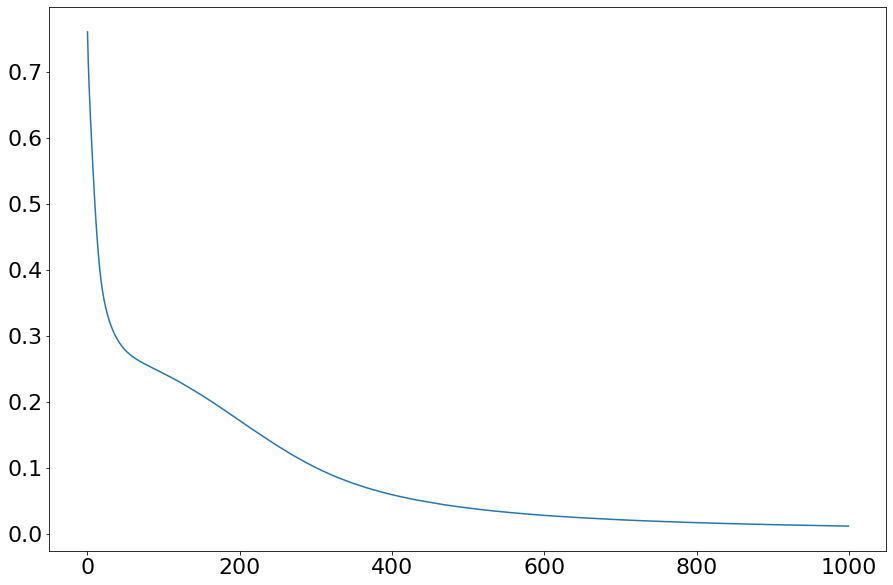

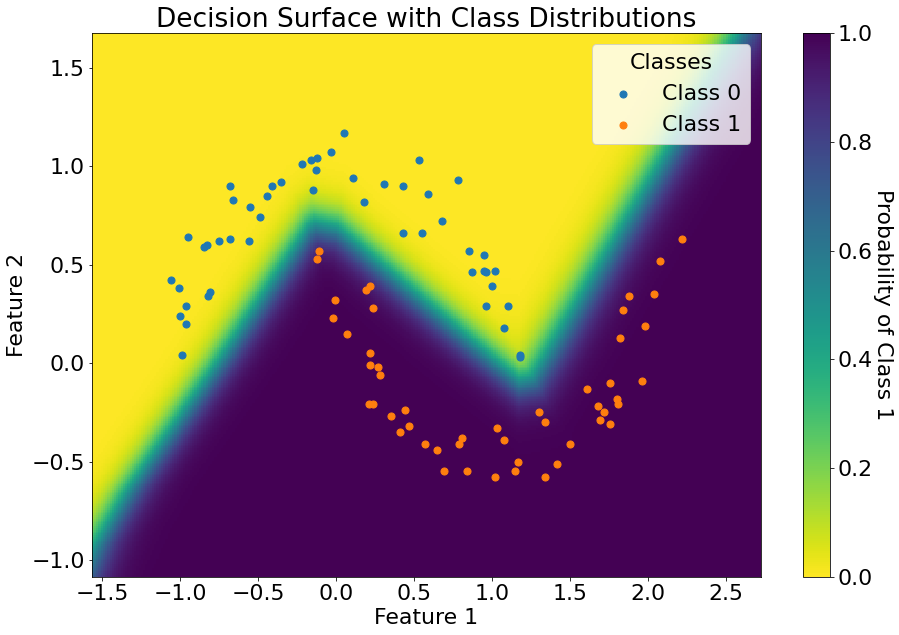

In [5]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.act = nn.ReLU()
        # Outras possíveis camadas não lineares:
        #self.act = nn.Sigmoid()
        #self.act = nn.Tanh()
        #self.act = nn.LeakyReLU()
        self.layer2 = nn.Linear(in_features=16, out_features=1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        x = self.layer2(x)

        return x
    
model = Model()

losses = train(model, inputs, targets, loss_func)

plt.figure(figsize=(15,10))
plt.plot(losses)
util.plot_regions(model, inputs, targets)

A primeira camada do modelo está fazendo a seguinte operação:

In [6]:
print(inputs.shape)
print(model.layer1.weight.shape)
print(model.layer1.bias.shape)

torch.Size([100, 2])
torch.Size([16, 2])
torch.Size([16])


In [7]:
#Tamanhos:
#[100,16]  = [100,2]             [2,16]                  [16]
activation = inputs@model.layer1.weight.T + model.layer1.bias
print(activation.shape)

torch.Size([100, 16])


Ou seja, ela recebe como entrada 100 pontos possuindo 2 features, e gera 100 novos pontos possuindo 16 features cada.

### Modelo profundo com múltiplas camadas

Quanto mais camadas a rede possui, mais complexa a função de decisão

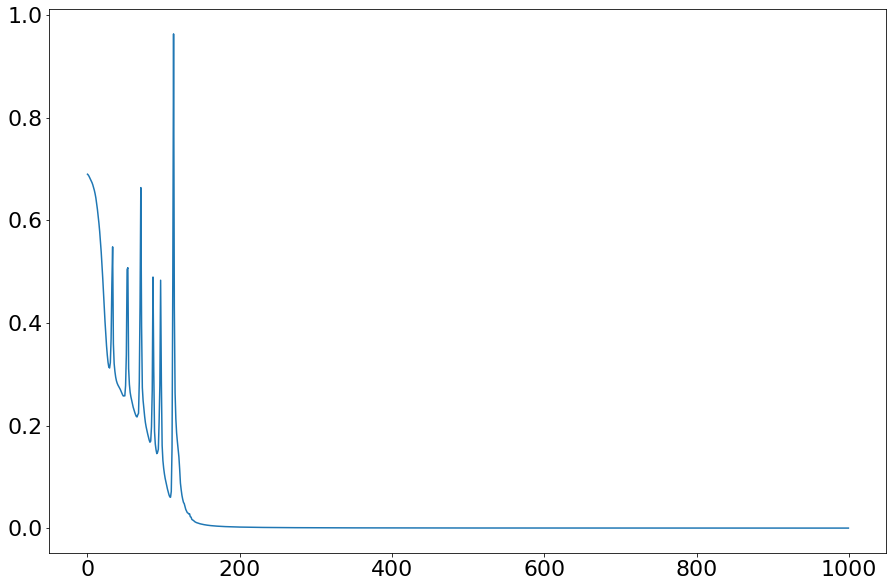

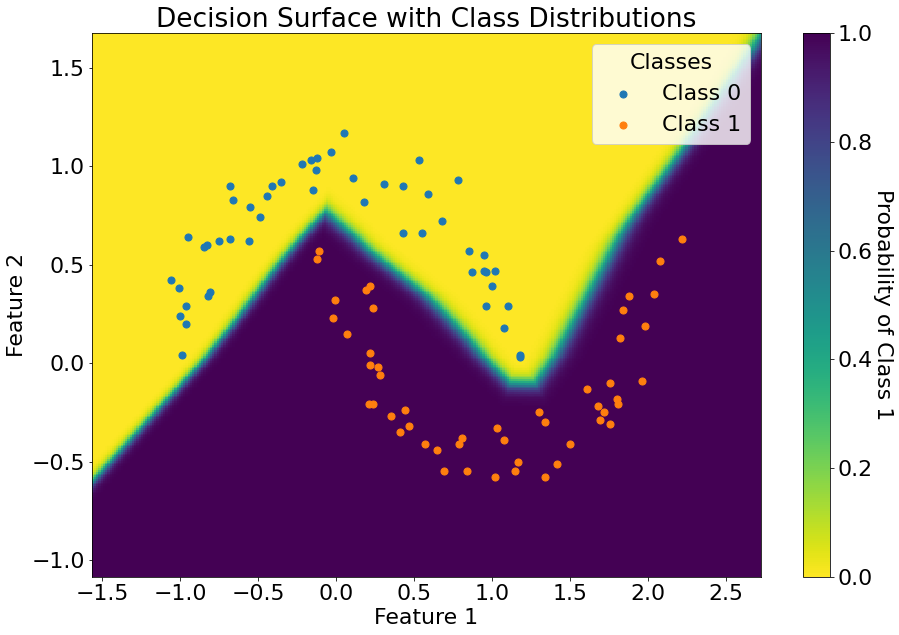

In [8]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l = nn.Sequential(
            nn.Linear(in_features=2, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=1)
        )
        
    def forward(self, x):
        return self.l(x)
    
model = Model()

losses = train(model, inputs, targets, loss_func)

plt.figure(figsize=(15,10))
plt.plot(losses)
util.plot_regions(model, inputs, targets)

### Regularização L2

Quando temos um modelo com muitas camadas, é comum que ele apresente *overfit*, ou seja, que o modelo se ajuste somente aos dados de treinamento e não generalize. Para evitar o overfit é comum o uso de regularização L2

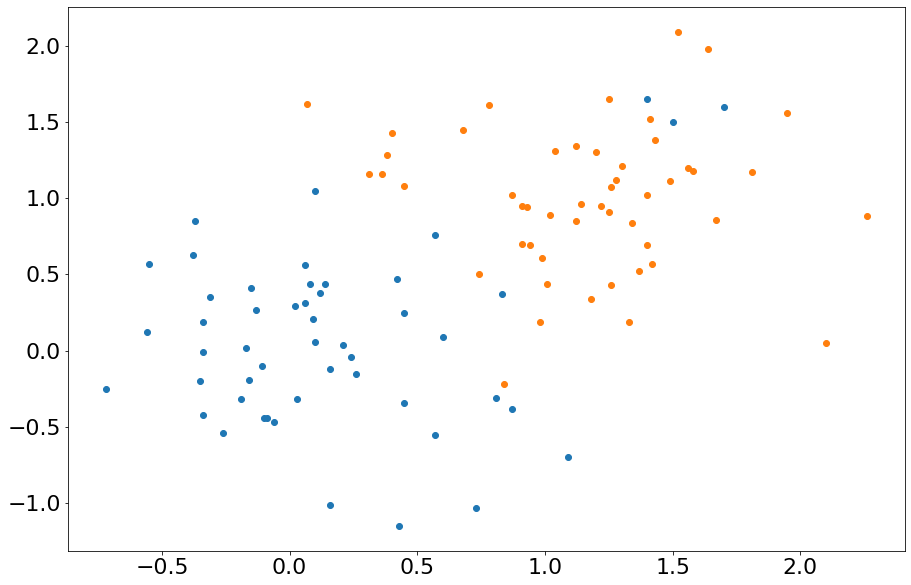

In [9]:
data = torch.from_numpy(np.loadtxt('../data/blob_data.txt')).to(torch.float32)

inputs = data[:,:2]
targets = data[:,2]

plt.figure(figsize=(15,10))
plt.scatter(inputs[targets==0,0], inputs[targets==0,1])
plt.scatter(inputs[targets==1,0], inputs[targets==1,1])

### Regularização L2 no Aprendizado de Máquina

A regularização L2, também conhecida como regularização Ridge ou norma Euclidiana quadrada, é uma técnica comum utilizada para prevenir o sobreajuste em modelos de aprendizado de máquina, especialmente em contextos onde o número de parâmetros é significativamente grande em relação ao número de amostras de dados. 

#### Princípios da Regularização L2

- **Fundamento:** A regularização L2 funciona adicionando um termo de penalidade ao custo ou função de perda do modelo durante o treinamento. Este termo de penalidade é proporcional à soma dos quadrados dos valores dos parâmetros do modelo, o que ajuda a manter os pesos do modelo pequenos e a controlar a complexidade do modelo.
  
- **Formulação Matemática:** A função de custo com regularização L2 é expressa como:
  $$
  J(\theta) = L(\theta) + \lambda \sum_{j=1}^{n} \theta_j^2
  $$
  onde $( L(\theta) )$ é a função de perda original (por exemplo, MSE para regressão), $( \theta )$ representa os parâmetros do modelo, $( n )$ é o número total de parâmetros, e $( \lambda )$ é o parâmetro de regularização que controla a intensidade da penalidade.

#### Impacto da Regularização L2

- **Controle de Magnitude dos Pesos:** Ao penalizar os valores altos dos parâmetros, a regularização L2 efetivamente restringe o espaço de parâmetros possíveis. Isto ajuda a evitar que o modelo se torne excessivamente complexo, o que poderia levar a um ajuste excessivo dos dados de treinamento.

- **Melhoria da Generalização:** Modelos com pesos menores tendem a ser menos sensíveis a pequenas variações nos dados de entrada, resultando em melhor desempenho em dados não vistos. A regularização L2 incentiva o modelo a ser suave e simples, favorecendo distribuições de peso que fazem previsões mais generalizáveis.

- **Prevenção de Co-linearidade e Redundância:** A regularização L2 é particularmente útil em situações onde há co-linearidade entre as características ou quando o modelo inclui características redundantes ou irrelevantes. Ao penalizar os pesos, a regularização L2 ajuda a mitigar os problemas associados à multicolinearidade nos dados.

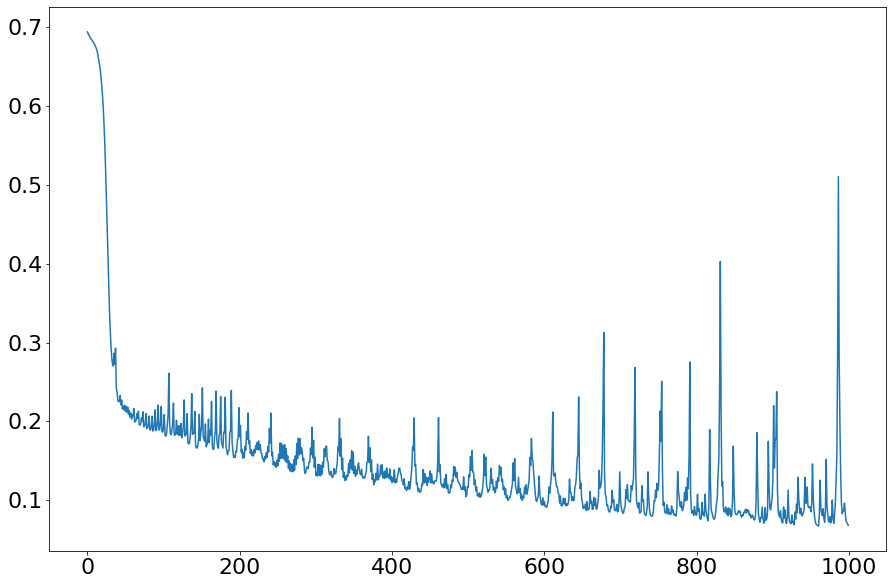

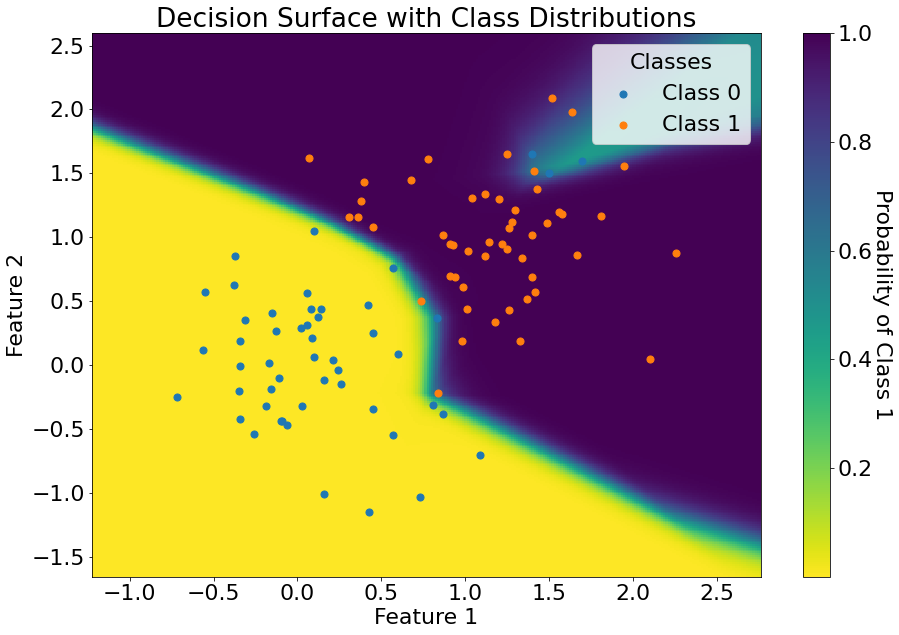

In [10]:
def sqr_sum(model):
    '''Calcula a média dos valores dos parâmetros ao quadrado.'''

    sum = 0.
    n = 0
    for param in model.parameters():
        sum += (param**2).sum()
        n += param.numel()

    return sum/n

class CrossEntropyL2:
    '''Entropia cruzada com regularização L2. `alpha` ajusta o grau de
    regularização.'''

    def __init__(self, model, alpha=0.):

        self.model = model
        self.alpha = alpha

    def __call__(self, inputs, targets):

        ce = F.binary_cross_entropy_with_logits(inputs, targets)
        l2 = sqr_sum(self.model)
        loss = ce + self.alpha*l2
        return loss

model = Model()
# O valor de `alpha` ajusta a suavidade da função de decisão
loss_func = CrossEntropyL2(model, alpha=0.)
losses = train(model, inputs, targets, loss_func)

plt.figure(figsize=(15,10))
plt.plot(losses)
util.plot_regions(model, inputs, targets)

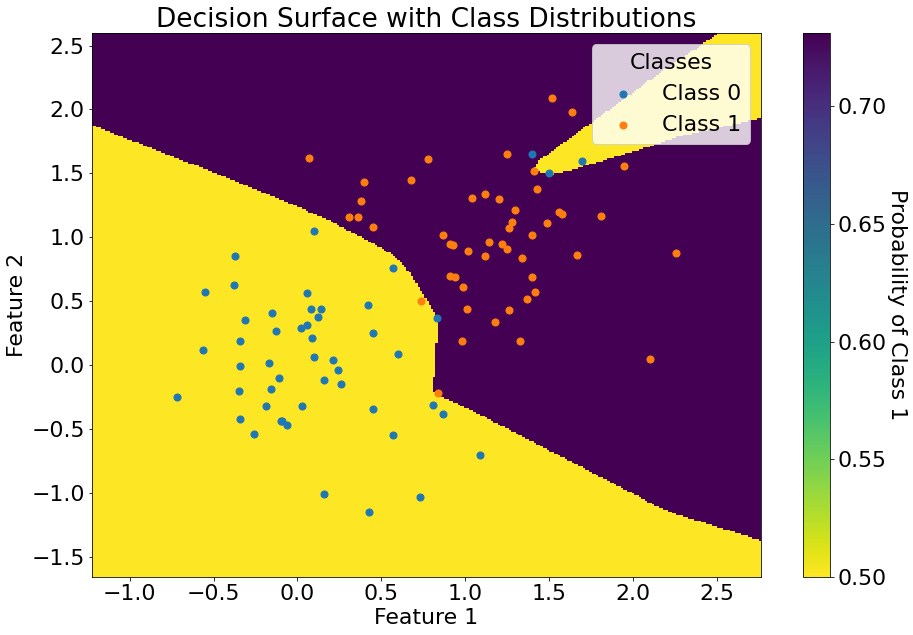

In [11]:
util.plot_regions(lambda x: (model(x)>0.5).int(), inputs, targets)